<a href="https://colab.research.google.com/github/harkpun/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**


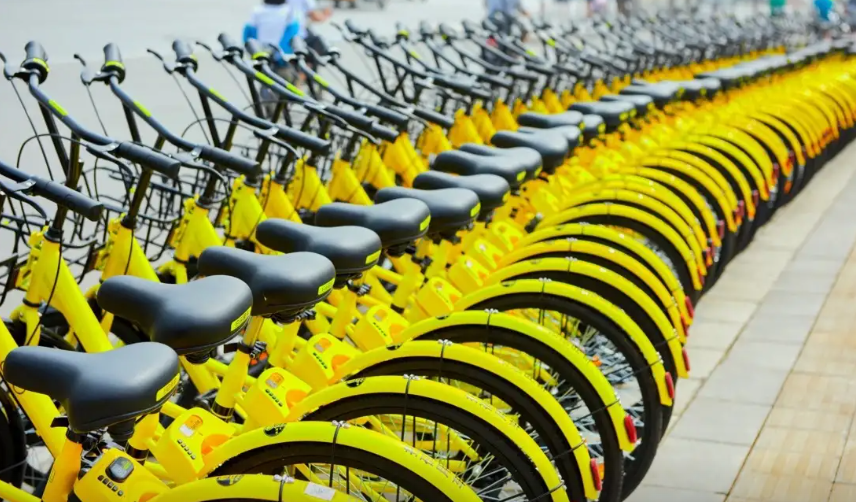

## <b> Data Description </b>

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


### <b>Attribute Information: </b>

* Date - year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature - Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing necessary libraries

import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)

**Importing Dataset**

In [2]:
url = 'https://raw.githubusercontent.com/harkpun/Bike-Sharing-Demand-Prediction/main/Data/SeoulBikeData.csv'
data = pd.read_csv(url, encoding= 'unicode_escape')

**Dataset view**

In [3]:
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

##**Data Cleaning**

In [4]:
# creating a copy of the original.
df = data.copy()

In [5]:
df.shape

(8760, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
# Statical analysis for numeric data
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [8]:
# Statical analysis for category data
df.describe(include=['object', 'category']).T

count unique         top  freq
Date             8760    365  01/12/2017    24
Seasons          8760      4      Spring  2208
Holiday          8760      2  No Holiday  8328
Functioning Day  8760      2         Yes  8465

In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**No missing value as well as duplicated value present in dataset.
So, the dataset that we have is cleaned data.**

## **Exploratory Data Analysis**

In [11]:
# Splitting Date into year, month, day & day_name
df.Date = pd.to_datetime(df.Date)

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.day_name()

# droping Date column
df.drop('Date', axis=1, inplace=True)

In [12]:
df.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

**Hour of the day, has a natural ordering - 9am is closer to 10am or 8am than it is to 6pm. It is best thought of as a discrete ordinal variable.**


In [13]:
def hour(x):
   
    ''' 
    converting hours into session like mornig, Noon, Night etc.
    just for EDA purpose, not using for model training. 
    'Hour' already present in label encoding format, So don't need to do anything with 'Hour' column. 
    '''
    
    if x>4 and x<=8:
        return 'Early Morning'
    elif x>8 and x<=12:
        return 'Morning'
    elif x>12 and x<=16:
        return 'Afternoon'
    elif x>16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    elif x<=4:
        return 'Late Night'

#apply funtion to make new category column
df['Session'] = df['Hour'].apply(hour)

In [14]:
# Grouping by functioning day and calculating the total Rented Bike Count
df.groupby('Functioning Day')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()

Functioning Day  Rented Bike Count
0             Yes            6172314
1              No                  0

In [15]:
# Grouping by seasons and calculating the total Rented Bike Count
df.groupby('Seasons')['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()

Seasons  Rented Bike Count
0  Summer            2283234
1  Autumn            1790002
2  Spring            1611909
3  Winter             487169

In [16]:
# Grouping by Holiday and calculating the total Rented Bike Count
df.groupby('Holiday')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()

Holiday  Rented Bike Count
0  No Holiday            5956419
1     Holiday             215895

### **Numerical and Categorical feature**

In [17]:
numeric_features = df.describe().columns
category_features = df.describe(include='object').columns

### **Removing Skewness**

<Figure size 1368x576 with 0 Axes>

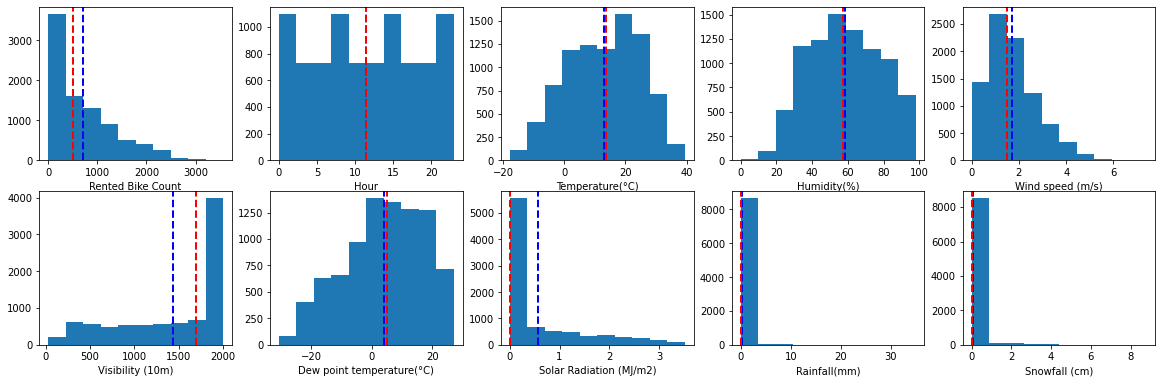

In [18]:
# Using Histogram for the features.
plt.figure(figsize=(19,8))
plt.suptitle('Skewness present in numeric feature', fontsize=20, fontweight='bold', y=1.02)

n=1
plt.figure(figsize=(20,13))
for col in numeric_features[:-3]:
  feature=df[col]
  plt.subplot(4,5,n)
  plt.hist(feature)
  plt.axvline(feature.mean(), color='blue', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='red', linestyle='dashed', linewidth=2)   
  plt.xlabel(col) 
  n+=1

**Observation:**

1. Right/Positive Skewed Distribution : Rented Bike Count, Wind Speed(m/s), Solar Radiation(MJ/m2)

2. No Skew : Hour, Temperature, Humidity(%),Rainfall(mm),Snowfall(cm)

3. Left/Negative Skewed Distribution : visibility(10m)

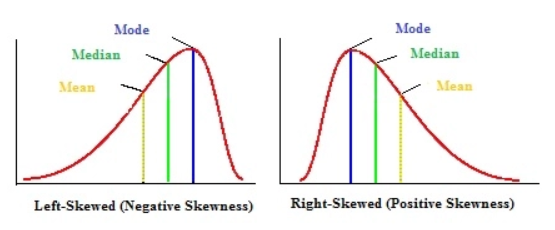

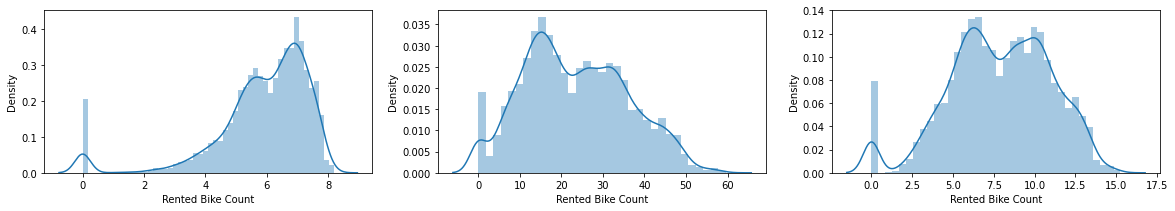

In [19]:
# checking for wich transformation is best for target variable
fig, axs = plt.subplots(1,3, figsize=(20,3))

sns.distplot(np.log1p(df['Rented Bike Count']),kde=True, ax=axs[0])
sns.distplot(np.sqrt(df['Rented Bike Count']),kde=True, ax=axs[1])
sns.distplot(np.cbrt(df['Rented Bike Count']),kde=True, ax=axs[2])

**Observation:**
1. Taking log transformation for dependent variable , don't help much as now distribution becomes negatively skewed.
2. The square root and cube root transformation removes the skewness but still the variable is not normally distributed. 

We will use square root transformation for regression as it tansforms the variable with well distributed.

In [20]:
# applying square root transformation to remove skeweness from data.
df['Rented Bike Count'] = np.sqrt(df['Rented Bike Count'])
df['Wind speed (m/s)'] = np.sqrt(df['Wind speed (m/s)'])
df['Visibility (10m)'] = np.sqrt(df['Visibility (10m)'])
df['Solar Radiation (MJ/m2)'] = np.sqrt(df['Solar Radiation (MJ/m2)'])

### **Univariate Analysis**

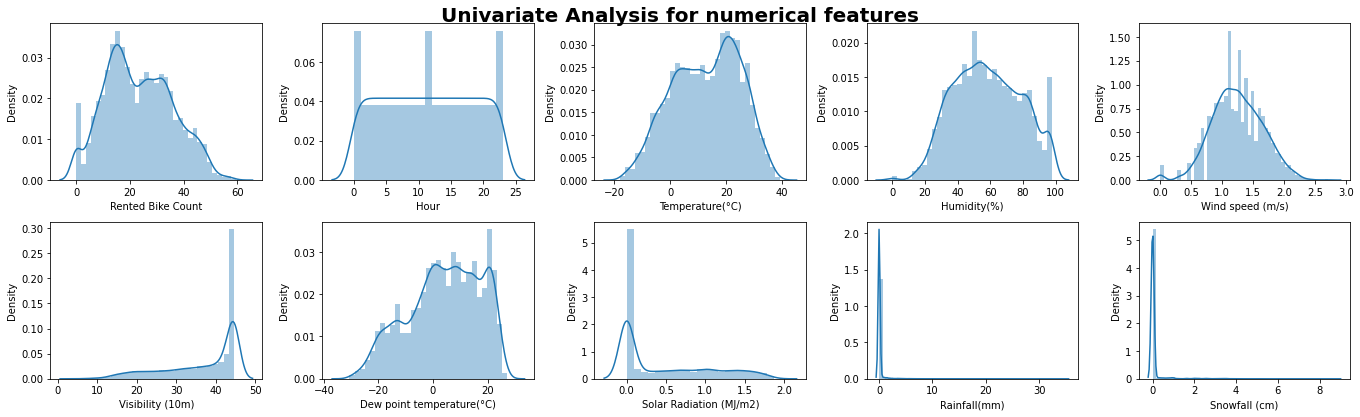

In [21]:
plt.figure(figsize=(19,8))
plt.suptitle('Univariate Analysis for numerical features', fontsize=20, fontweight='bold', y=1.01)

for i in range(0, len(numeric_features[:-3])):
    plt.subplot(3, 5, i+1)
    sns.distplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

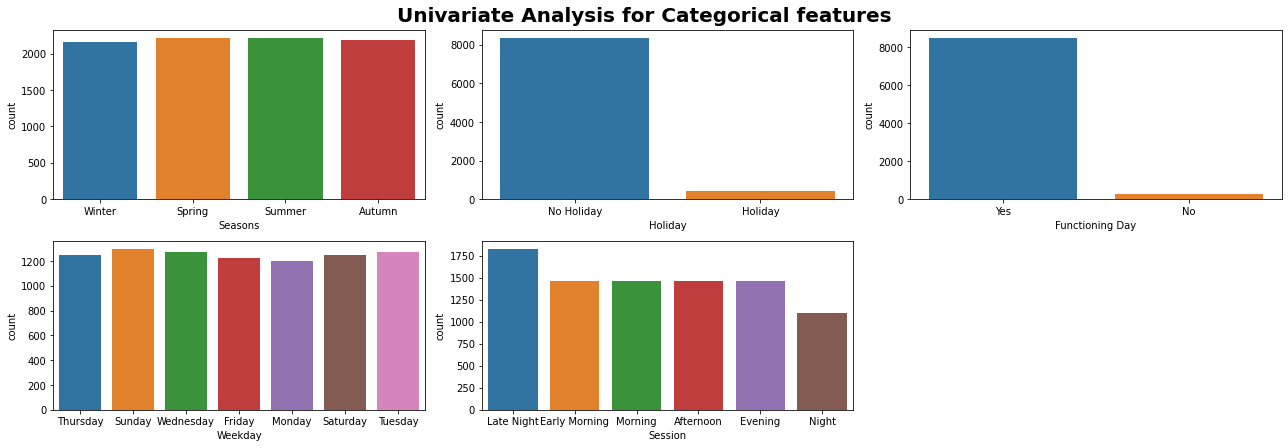

In [22]:
plt.figure(figsize=(18,6))
plt.suptitle('Univariate Analysis for Categorical features', fontsize=20, fontweight='bold', y=1.03)

for i in range(len(category_features)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[category_features[i]], data=df)
    plt.xlabel(category_features[i])
    plt.tight_layout()

### **Outlier detection**

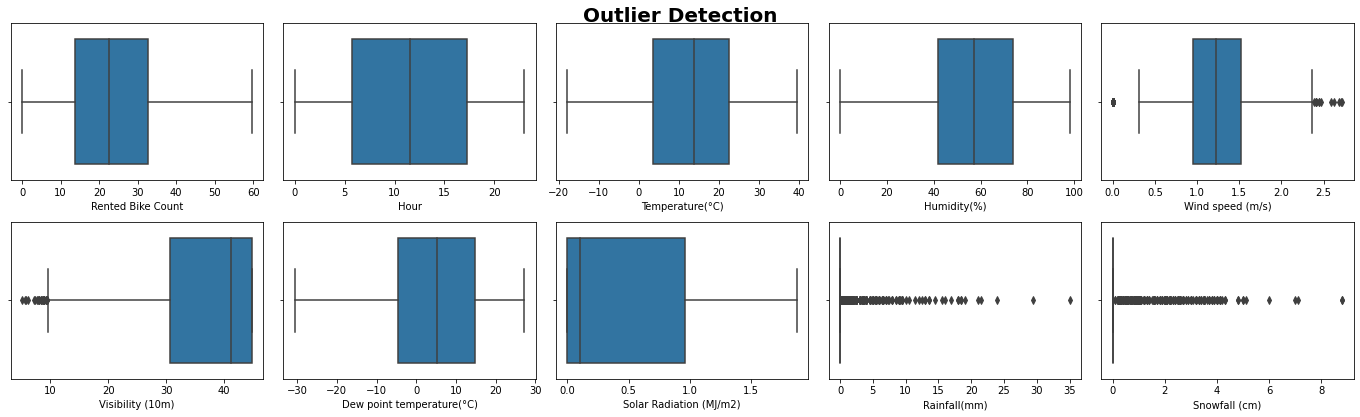

In [23]:
plt.figure(figsize=(19,8))
plt.suptitle('Outlier Detection', fontsize=20, fontweight='bold', y=1.01)

for i in range(0, len(numeric_features[:-3])):
    plt.subplot(3, 5, i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

data that we have is from "Seoul" city bike sharing data.

**Observation**:
1. Outlier present in 'Wind speed', 'Visibility', 'Rainfall' and 'Snowfall'.
2. Considering "Seoul" city enviormental aspects or weather condition it is possible to having these outlier.

So, we are keeping outlier data as it is.

### **Bivariate Analysis**

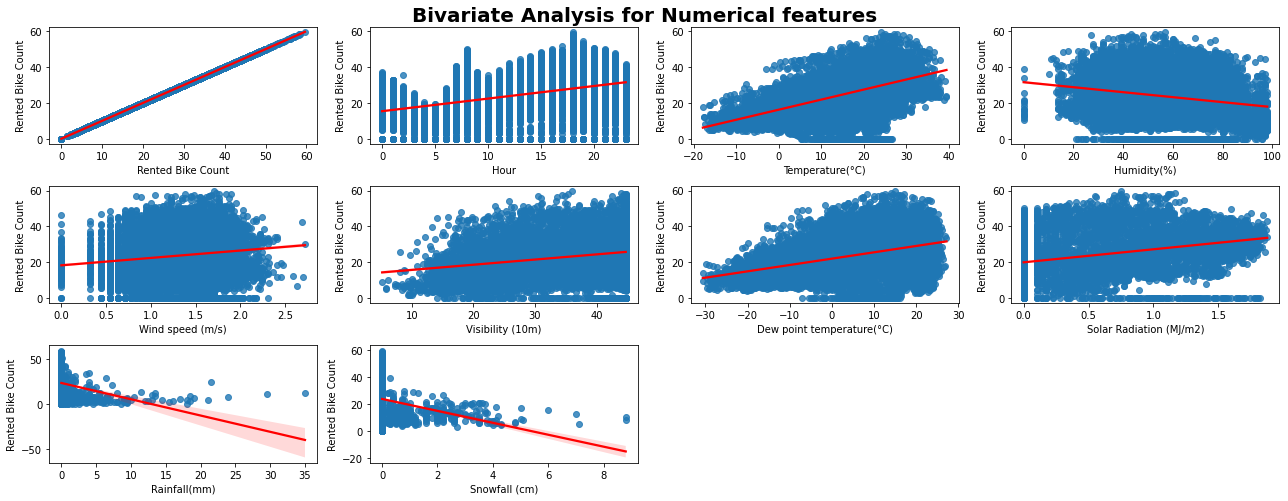

In [24]:
plt.figure(figsize=(18,13))
plt.suptitle('Bivariate Analysis for Numerical features', fontsize=20, fontweight='bold', y=1.01)

for i in range(len(numeric_features[:-3])):
    plt.subplot(6, 4, i+1)
    sns.regplot(x=df[numeric_features[i]], y=df['Rented Bike Count'], line_kws={'color':'red'})
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**Observation**:
1. Tempearture, Dew point temperature, Wind speed, Solar radiation are positively corerlated with Target variable.
2. Humidity, Rainfall, Snowfall are nregatively correlated with target variable.

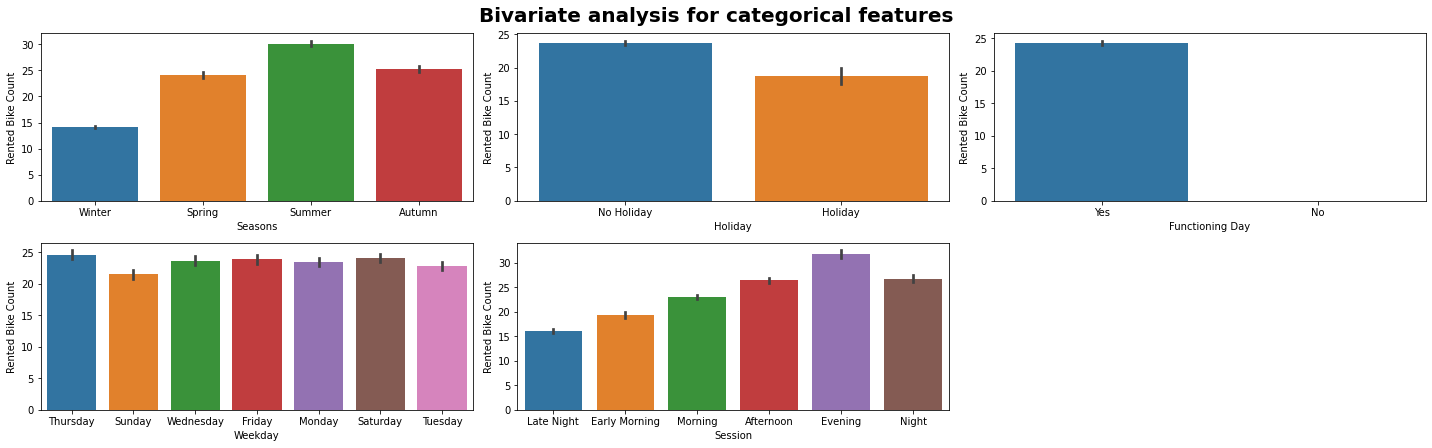

In [25]:
plt.figure(figsize=(20,6))
plt.suptitle('Bivariate analysis for categorical features', fontsize=20, fontweight='bold', y=1.03)

for i in range(len(category_features)):
    plt.subplot(2, 3, i+1)
    sns.barplot(x=df[category_features[i]], y=df['Rented Bike Count'])
    plt.xlabel(category_features[i])
    plt.tight_layout()

**Observation**:
1. Most of the rented bikes are count in summer season and lesser count in winter season, may be because of coldness or snowfall peoples are less prefer bike sharing during winter season.
2. People prefer bike sharing mostly during No Holiday comparitively Holiday.
3. Almost all people prefer bike sharing during Functioning days only.
4. Most of the orgnisation prefer Sunday as Holiday, thats why the Rented bike count less on sunday.
5. At evening high demand on bike sharing beacuse of office leave time. Lesser bike count at Late Night.

### **Multivariate Analysis**

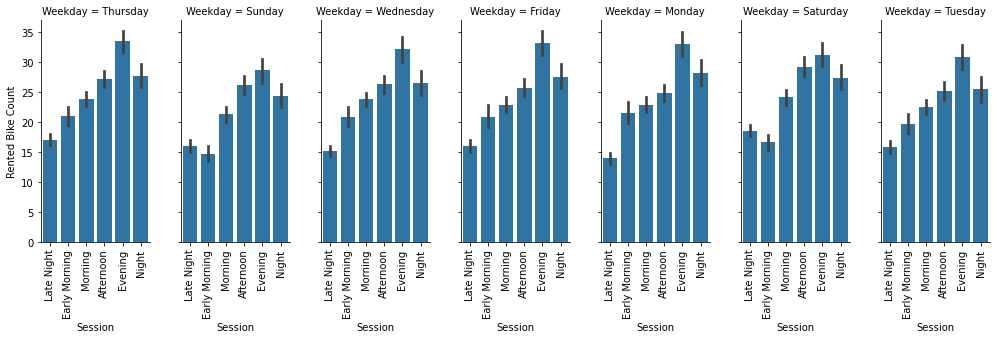

In [26]:
g = sns.FacetGrid(df, col="Weekday", height=4, aspect=.5)
g.map(sns.barplot, "Session", "Rented Bike Count")
g.set_xticklabels(rotation=90)

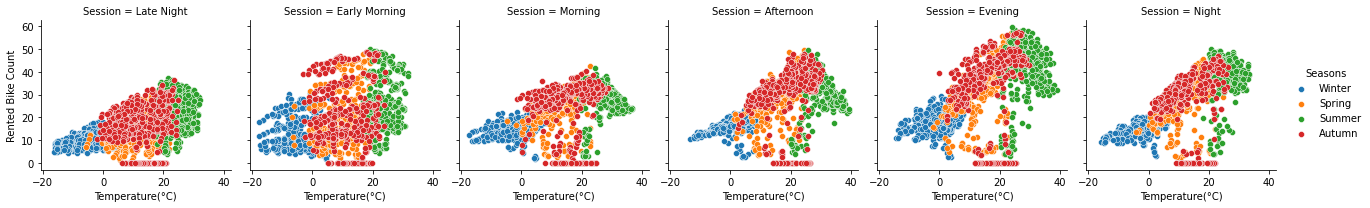

In [27]:
g = sns.FacetGrid(df, col="Session", hue='Seasons')
g.map(sns.scatterplot, "Temperature(°C)", "Rented Bike Count")
g.add_legend()

1. Demand of bike got increase during Summer and Autumn season.
2. People are less prefer bike during winter season.
3. At evening high demand on bike sharing beacuse of office leave time.
4. High number of counted bike shows in between 20-35 Temperature.

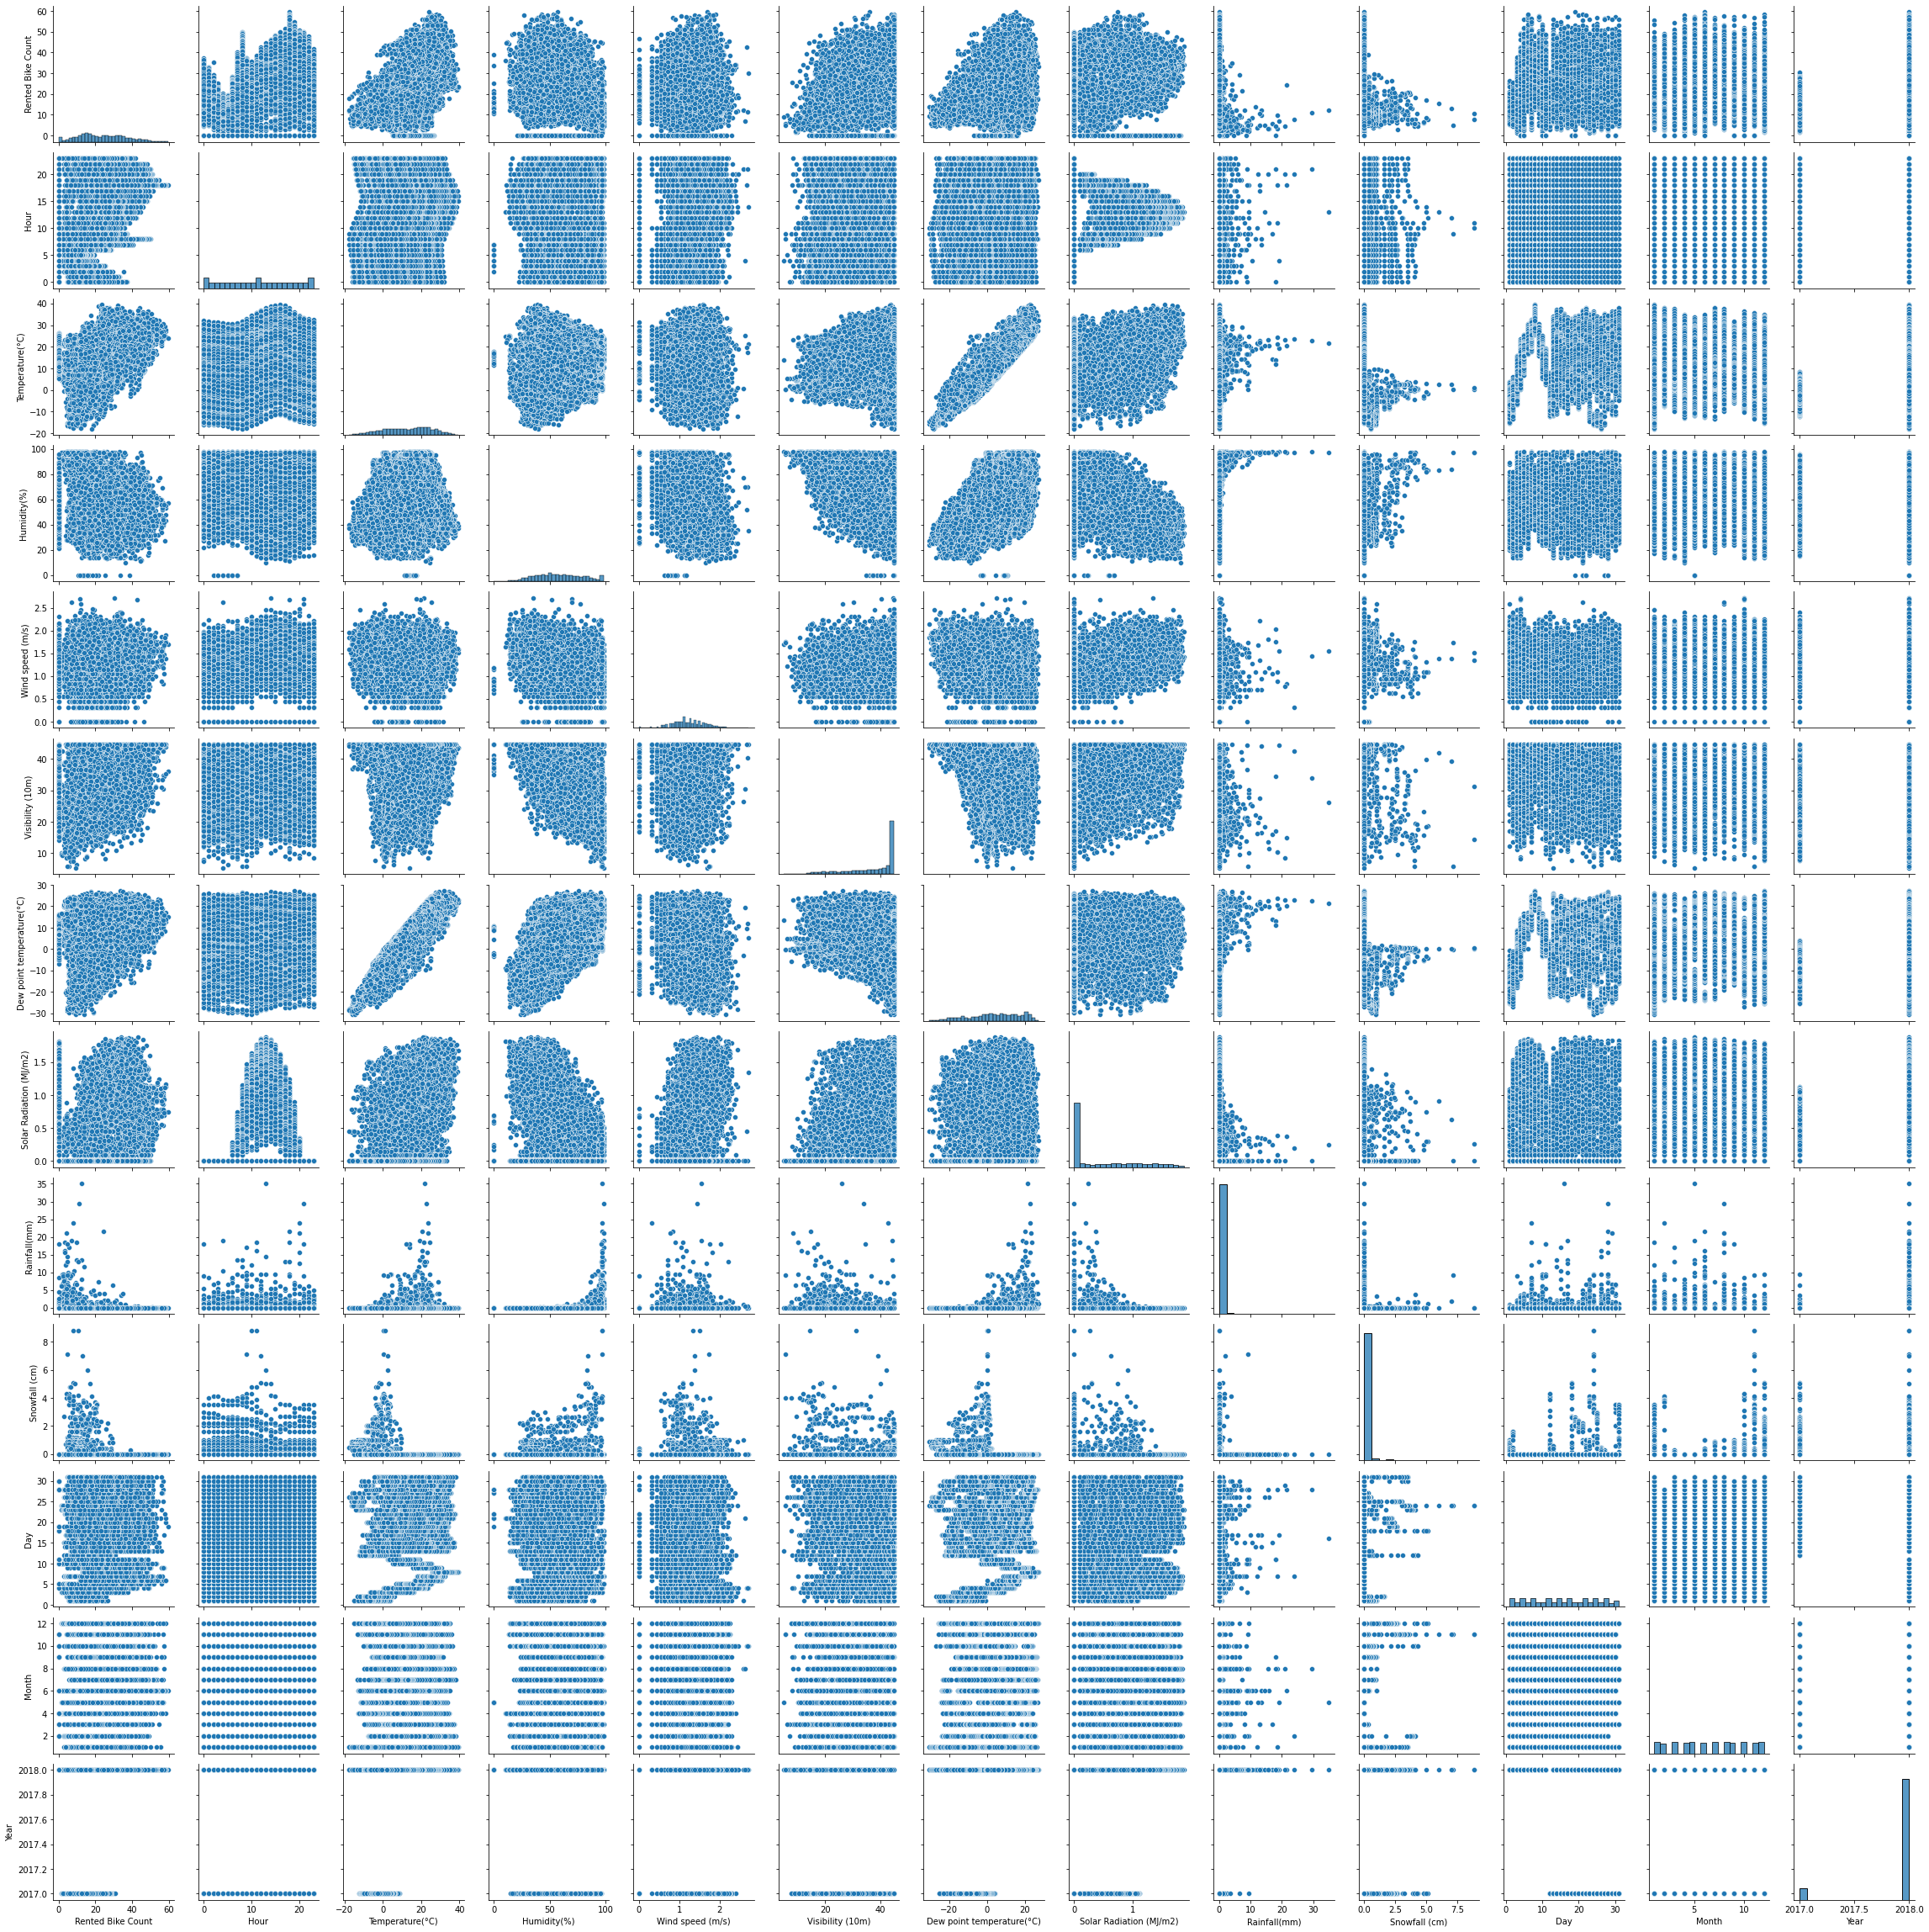

In [28]:
# A pairs plot allows us to see both distribution of single variables and relationships between two variables 
sns.pairplot(df)

## **Feature Selection**

### **Removing Multicollinearity**


#### **Correlation Heatmap**

Correlation is a statistical measure that expresses the strength of the relationship between two variables.

1. Positive correlation occurs when two variables move in the same direction; as one increases, so do the other.

2. Negative correlation occurs when two variables move in opposite directions; as one increases, the other decreases.


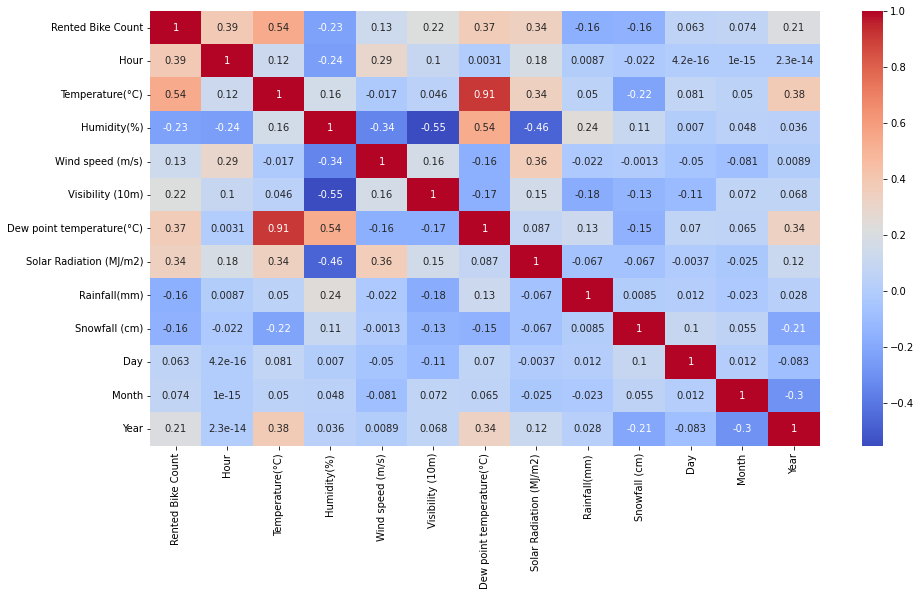

In [29]:
# correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

**Observation**:
* From above correlation heatmap that tempreture is highly correlated 
with Dew point tempreture ,so there is collinearity between these two features.

* To remove multicollinearity from our data we need to remove either tempreture column or Dew point tempreture column

* As we can see from heatmap that tempreture column has high correlation with our target variable (rented bike count) compare to Dew point tempreture ,so let's remove Dew point tempreture column from our dataframe.

#### **VIF Analysis**

using VIF to remove multicollinearity

A variance inflation factor(VIF) detects multicollinearity in regression analysis.The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  # For each X, calculate VIF and save in dataframe
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["features"] = X.columns
  
  return vif

In [31]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count', 'Year', 'Dew point temperature(°C)', 'Wind speed (m/s)']]])

VIF Factor                 features
0    3.743836                     Hour
1    3.028381          Temperature(°C)
2    7.036287              Humidity(%)
3    8.562949         Visibility (10m)
4    2.321899  Solar Radiation (MJ/m2)
5    1.086941             Rainfall(mm)
6    1.141712            Snowfall (cm)
7    3.926467                      Day
8    4.644208                    Month

In [32]:
final_numerical_features = ['Hour','Temperature(°C)', 'Humidity(%)', 'Visibility (10m)',
                     'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','Day', 'Month']

### **Encoding**

In [33]:
df1 = df.copy()

In [34]:
# Ordinal Encoding
df1['Functioning Day'] = df1['Functioning Day'].map({'Yes':1, 'No':0})

df1['Holiday'] = df1['Holiday'].map({'Holiday':1, 'No Holiday':0})

df1['Weekday'] = df['Weekday'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})


# One hot encoding
df1 = pd.get_dummies(df1, columns=['Seasons'], drop_first=True)

In [35]:
# display all the columns present in dataset
pd.options.display.max_columns = None

In [36]:
df1.sample(3)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
8355          14.491377     3              6.1           66          0.707107   
5525          18.138357     5             23.6           88          0.447214   
5630          25.884358    14             34.3           45          1.483240   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
8355         36.701499                        0.2                 0.000000   
5525         24.576411                       21.4                 0.000000   
5630         44.350874                       20.6                 1.280625   

      Rainfall(mm)  Snowfall (cm)  Holiday  Functioning Day  Day  Month  Year  \
8355           0.0            0.0        0                1   14     11  2018   
5525           0.0            0.0        0                1   19      7  2018   
5630           0.0            0.0        0                1   23      7  2018   

      Weekday        Session  Seasons_Spring  Seasons_Summer  Seasons_Winter  
8355        3     Late Night               0               0               0  
5525        4  Early Morning               0               1               0  
5630        1      Afternoon               0               1               0

### **Feature selecting**

In [37]:
df1.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Day', 'Month', 'Year', 'Weekday', 'Session',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter'],
      dtype='object')

In [38]:
final_categorical_features = ['Holiday', 'Functioning Day', 'Weekday',
                          'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']

In [39]:
final_numerical_features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month']

In [40]:
independent_features = final_numerical_features.copy()
independent_features.extend(final_categorical_features)

independent_features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Holiday',
 'Functioning Day',
 'Weekday',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter']

In [41]:
len(independent_features)

15

In [42]:
final_df = independent_features + ['Rented Bike Count']
final_df

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Holiday',
 'Functioning Day',
 'Weekday',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Rented Bike Count']

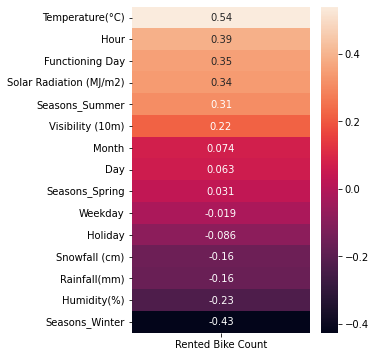

In [43]:
plt.figure(figsize=(4,6))
sns.heatmap(df1[final_df].corr()[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False)[1:],annot=True)

In [44]:
X = df1[independent_features]
y = df1['Rented Bike Count']

## **Model Implementation**

### **Train Test Split**

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

print(X_train.shape)
print(X_test.shape)

(6570, 15)
(2190, 15)


### **Preprocessing**

Using Sclaing dosen't impact on Decison tree and Ensemble technique cause all ensemble model follow decision tree.
But using Scaling will impact on SVM model, LinearRegression model and regularization model(L1, L2, Elastic Net).


In [46]:
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Model Selection**

#### **Linear Regression**

In [47]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [48]:
print(f'train data score : {reg.score(X_train, y_train)}')
print(f'test data score : {reg.score(X_test, y_test)}')

train data score : 0.6504554467101539
test data score : 0.6538958268675931


In [49]:
d = {'Feature': X.columns, 'Coefficient': reg.coef_}
pd.DataFrame(data=d)

Feature  Coefficient
0                      Hour     3.509785
1           Temperature(°C)     5.163127
2               Humidity(%)    -2.595127
3          Visibility (10m)     0.303863
4   Solar Radiation (MJ/m2)     0.161833
5              Rainfall(mm)    -1.655532
6             Snowfall (cm)    -0.040651
7                       Day     0.060297
8                     Month     0.270051
9                   Holiday    -0.613442
10          Functioning Day     5.273960
11                  Weekday    -0.245119
12           Seasons_Spring    -1.243774
13           Seasons_Summer    -1.054131
14           Seasons_Winter    -3.392068

In [50]:
y_pred = reg.predict(X_test)

In [51]:
d = {'y_actual':y_test, 'y_predict':y_pred, 'error difference':y_test-y_pred}
pd.DataFrame(data=d).head()

y_actual  y_predict  error difference
1425  14.730920  12.077426          2.653494
7993  20.976177  19.668303          1.307874
897   11.958261  12.490552         -0.532291
5813  16.852300  29.342656        -12.490356
1708   8.888194   9.500206         -0.612012

In [52]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE : 52.55731926600699
RMSE : 7.249642699196078
R2 : 0.6538958268675931
Adjusted R2 :  0.6515078035939104


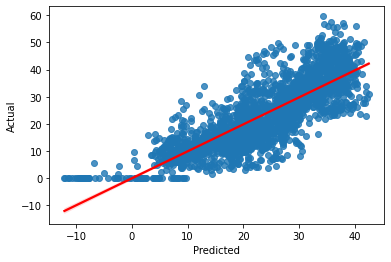

In [53]:
sns.regplot(x=y_pred, y=y_test, line_kws={'color':'red'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

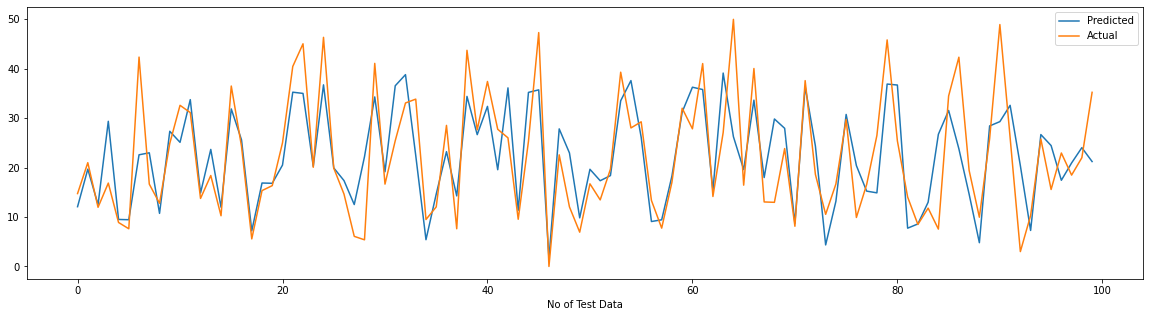

In [54]:
plt.figure(figsize=(20,5))
plt.plot((y_pred)[:100])
plt.plot(np.array((y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

**Creating new function for using ML algorithams**

In [55]:
def predict(ml_model,X,y):
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=33)
    
    # data preprocessing using standardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # model fitting
    model = ml_model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # graph--->best fit line on test data
    sns.regplot(x=y_pred_test, y=y_test, line_kws={'color':'red'})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # evaluation metrics on train data
    train_MSE  = mean_squared_error(y_train, y_pred_train)
    train_RMSE = np.sqrt(train_MSE)
    train_r2 = r2_score(y_train, y_pred_train)
    print("train MSE :" , train_MSE)
    print("train RMSE :" ,train_MSE)
    print("train R2 :" ,train_r2)
    print("train Adj R2 : ",1-(1-r2_score(y_train, y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
    print('-'*150)

    # evaluation metrics on test data
    test_MSE  = mean_squared_error(y_test, y_pred_test)
    test_RMSE = np.sqrt(test_MSE)
    test_r2 = r2_score(y_test, y_pred_test)
    print("test MSE :" , test_MSE)
    print("test RMSE :" ,test_RMSE)
    print("test R2 :" , test_r2)
    print("test Adj R2 : ",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
    print('-'*150)

    # graph---> actual vs predicted on test data
    plt.figure(figsize=(20,5))
    plt.plot((y_pred_test)[:100])
    plt.plot(np.array((y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.xlabel('No of Test Data')
    plt.show()
    print('-'*150)

    # actual vs predicted value on test data
    d = {'y_actual':y_test, 'y_predict':y_pred, 'error_difference':y_test-y_pred_test}
    return pd.DataFrame(data=d).head().T

#### **Linear regression Regularization**
1. **Lasso (L1)**
2. **Ridge (L2)**
3. **Elastic Net (combination of L1 and L2)**

#####**Lasso (L1)**

train MSE : 54.54565260099811
train RMSE : 54.54565260099811
train R2 : 0.6504554464218847
train Adj R2 :  0.6496554512580653
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 52.557404459846104
test RMSE : 7.24964857492045
test R2 : 0.653895265843103
test Adj R2 :  0.6515072386985061
------------------------------------------------------------------------------------------------------------------------------------------------------


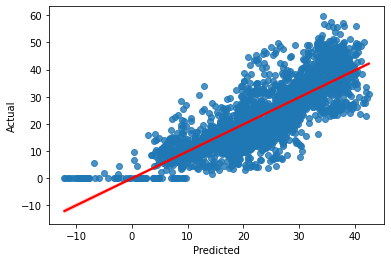

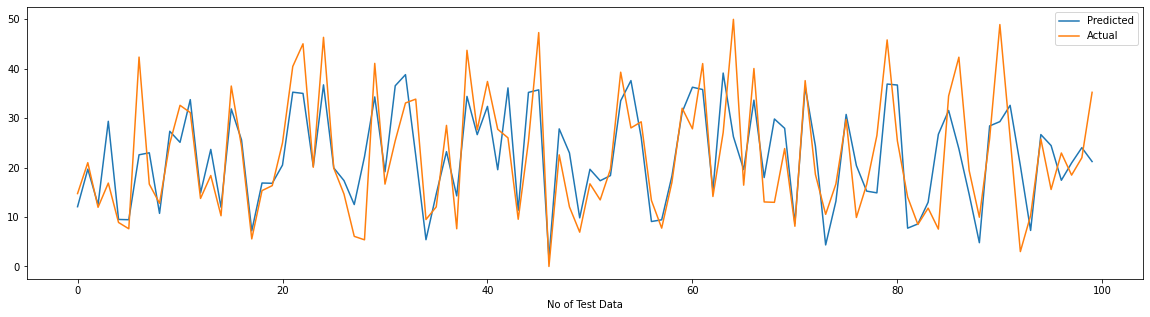

------------------------------------------------------------------------------------------------------------------------------------------------------


1425       7993       897        5813      1708
y_actual          14.730920  20.976177  11.958261  16.852300  8.888194
y_predict         12.077426  19.668303  12.490552  29.342656  9.500206
error_difference   2.653187   1.307826  -0.532397 -12.490308 -0.611980

In [56]:
predict(Ridge(alpha=0.1, max_iter=1000),X,y)

#####**Ridge (L2)**

train MSE : 54.745172225647146
train RMSE : 54.745172225647146
train R2 : 0.6491768660987529
train Adj R2 :  0.6483739446754208
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 52.908763901058435
test RMSE : 7.27384106927409
test R2 : 0.6515814688197508
test Adj R2 :  0.6491774771142753
------------------------------------------------------------------------------------------------------------------------------------------------------


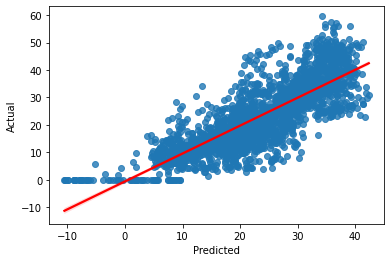

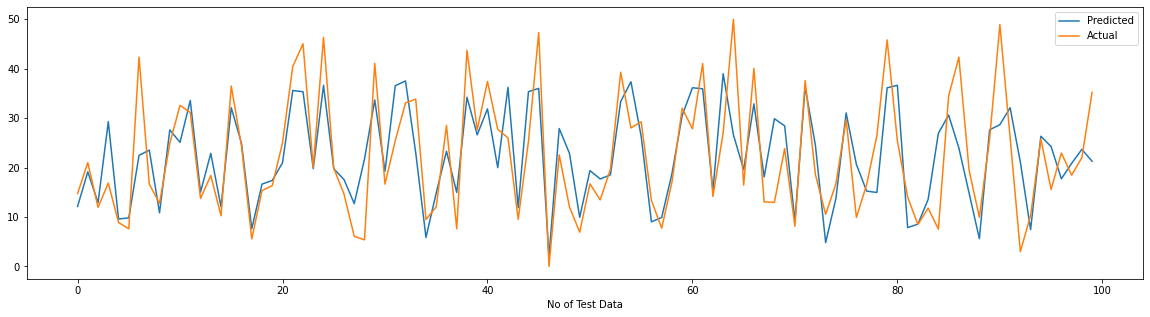

------------------------------------------------------------------------------------------------------------------------------------------------------


1425       7993       897        5813      1708
y_actual          14.730920  20.976177  11.958261  16.852300  8.888194
y_predict         12.077426  19.668303  12.490552  29.342656  9.500206
error_difference   2.606454   1.850262  -0.917797 -12.411675 -0.703782

In [57]:
predict(Lasso(alpha=0.1, max_iter=1000),X,y)

#####**Elastic Net (combine of L1 & L2)**

train MSE : 55.0858504887208
train RMSE : 55.0858504887208
train R2 : 0.6469936997839059
train Adj R2 :  0.6461857817943969
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.35888369409063
test RMSE : 7.304716537559184
test R2 : 0.6486173081480573
test Adj R2 :  0.6461928645520227
------------------------------------------------------------------------------------------------------------------------------------------------------


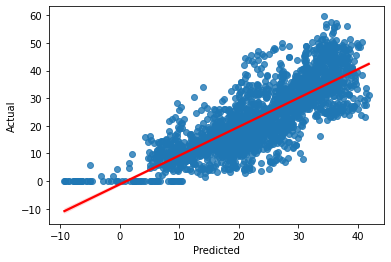

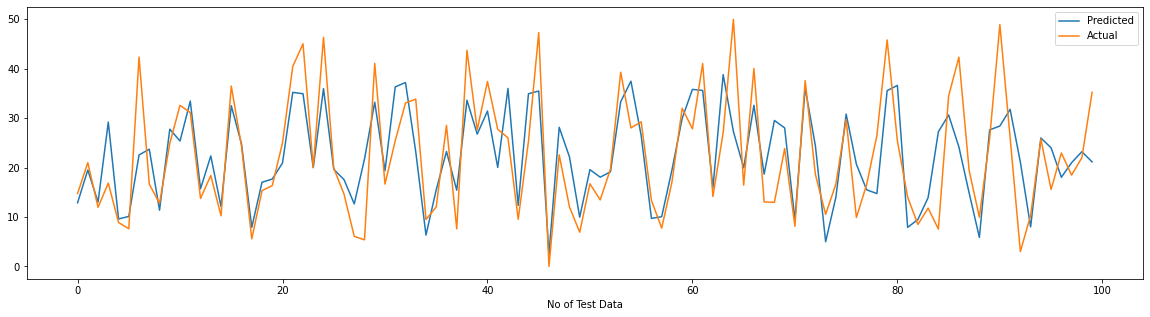

------------------------------------------------------------------------------------------------------------------------------------------------------


1425       7993       897        5813      1708
y_actual          14.730920  20.976177  11.958261  16.852300  8.888194
y_predict         12.077426  19.668303  12.490552  29.342656  9.500206
error_difference   1.867283   1.482013  -1.051420 -12.329207 -0.710731

In [58]:
predict(ElasticNet(alpha=0.1, max_iter=1000),X,y)

#### **K-Nearest Neighbors**

train MSE : 20.44206970207864
train RMSE : 20.44206970207864
train R2 : 0.8690012166415065
train Adj R2 :  0.8687014025203016
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 25.657481880430726
test RMSE : 5.065321498229972
test R2 : 0.8310385370695705
test Adj R2 :  0.8298727496068491
------------------------------------------------------------------------------------------------------------------------------------------------------


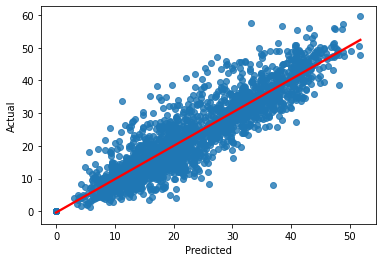

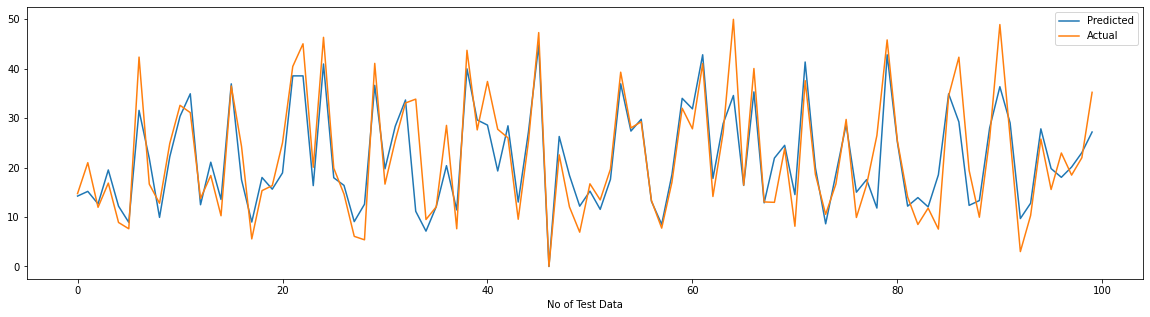

------------------------------------------------------------------------------------------------------------------------------------------------------


1425       7993       897        5813      1708
y_actual          14.730920  20.976177  11.958261  16.852300  8.888194
y_predict         12.077426  19.668303  12.490552  29.342656  9.500206
error_difference   0.504337   5.801991  -0.687754  -2.652270 -3.297428

In [59]:
predict(KNeighborsRegressor(n_neighbors=7),X,y)

#### **Supprot Vector Machine**

train MSE : 30.4772849624247
train RMSE : 30.4772849624247
train R2 : 0.8046926114461996
train Adj R2 :  0.8042456155920179
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 30.04669338657633
test RMSE : 5.481486421270815
test R2 : 0.8021343912673642
test Adj R2 :  0.8007691731758326
------------------------------------------------------------------------------------------------------------------------------------------------------


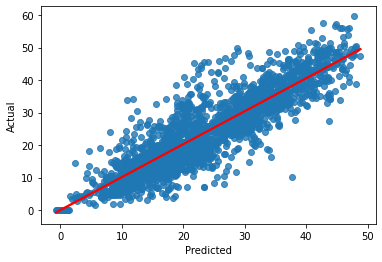

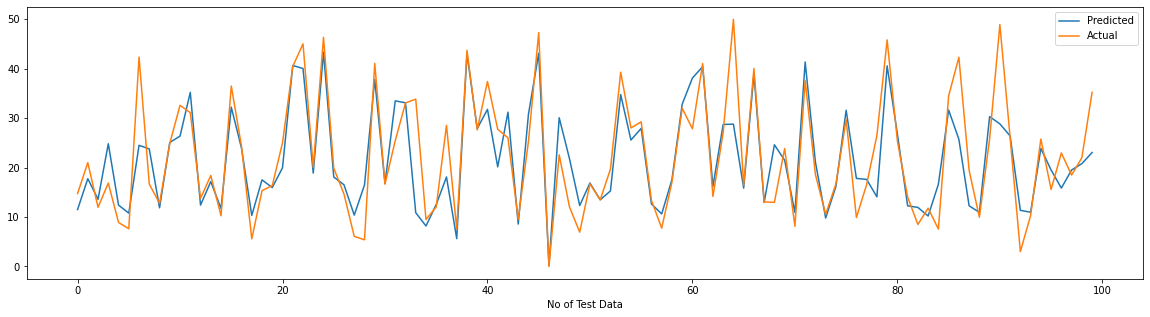

------------------------------------------------------------------------------------------------------------------------------------------------------


1425       7993       897        5813      1708
y_actual          14.730920  20.976177  11.958261  16.852300  8.888194
y_predict         12.077426  19.668303  12.490552  29.342656  9.500206
error_difference   3.236611   3.238474  -1.618632  -7.949625 -3.511095

In [60]:
predict(SVR(kernel='rbf',C=2),X,y)

#### **Decision Tree**

train MSE : 1.5861391894369432
train RMSE : 1.5861391894369432
train R2 : 0.9898355544677387
train Adj R2 :  0.9898122913180616
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 18.954130793384028
test RMSE : 4.3536342052800014
test R2 : 0.8751819183835235
test Adj R2 :  0.8743207080687825
------------------------------------------------------------------------------------------------------------------------------------------------------


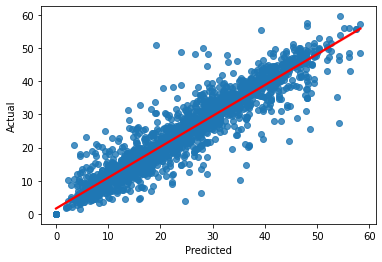

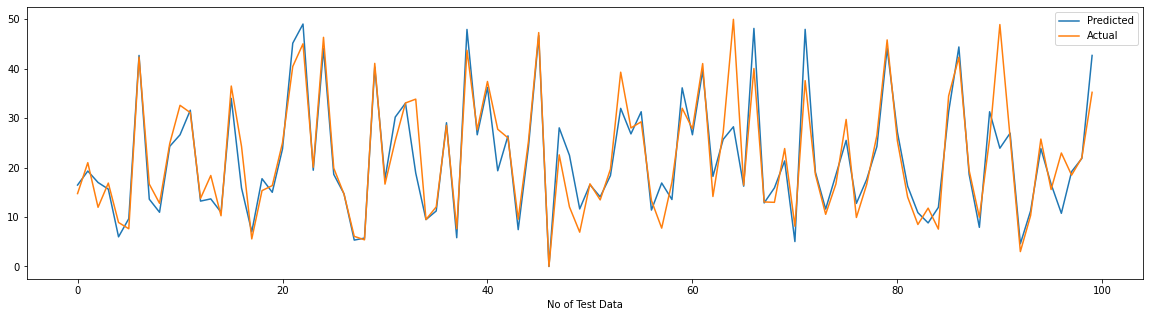

------------------------------------------------------------------------------------------------------------------------------------------------------


1425       7993       897        5813      1708
y_actual          14.730920  20.976177  11.958261  16.852300  8.888194
y_predict         12.077426  19.668303  12.490552  29.342656  9.500206
error_difference  -1.723050   1.690066  -5.010960   1.215812  2.902750

In [61]:
predict(DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=3, random_state=33),X,y)

#### **Ensemble Model**

#####**Random Forest**

train MSE : 8.133627395065831
train RMSE : 8.133627395065831
train R2 : 0.9478773280507603
train Adj R2 :  0.9477580360032719
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 13.17137325788206
test RMSE : 3.6292386609152696
test R2 : 0.9132629419821642
test Adj R2 :  0.9126644802203115
------------------------------------------------------------------------------------------------------------------------------------------------------


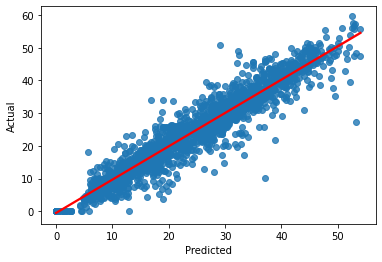

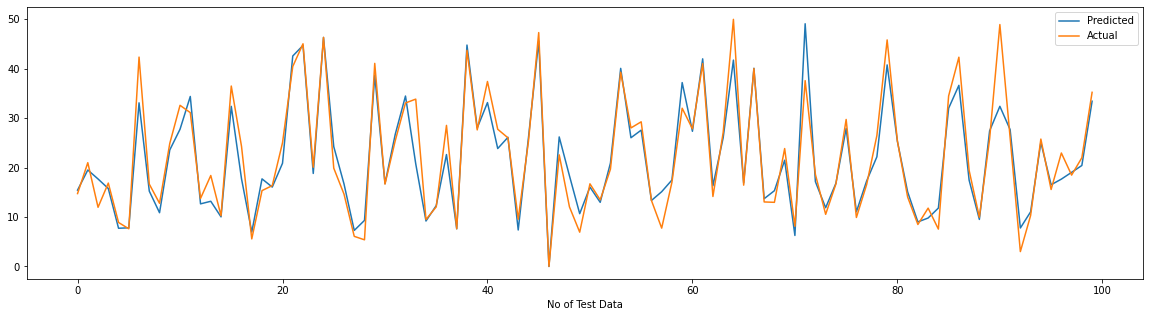

------------------------------------------------------------------------------------------------------------------------------------------------------


1425       7993       897        5813      1708
y_actual          14.730920  20.976177  11.958261  16.852300  8.888194
y_predict         12.077426  19.668303  12.490552  29.342656  9.500206
error_difference  -0.694643   1.478769  -5.724121   1.103860  1.169069

In [62]:
predict(RandomForestRegressor(n_estimators=100, min_samples_leaf=7, min_samples_split=5, random_state=33),X,y)

#####**Xtreme Gradient Boosting**

[18:25:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train MSE : 12.992530047496613
train RMSE : 12.992530047496613
train R2 : 0.9167400535378442
train Adj R2 :  0.9165494982743513
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 14.588169318441341
test RMSE : 3.8194462057268646
test R2 : 0.903932956437139
test Adj R2 :  0.9032701203499988
------------------------------------------------------------------------------------------------------------------------------------------------------


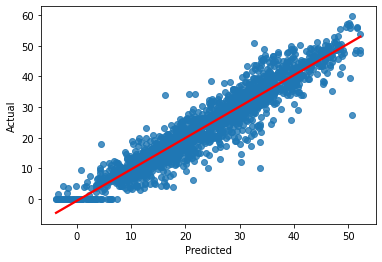

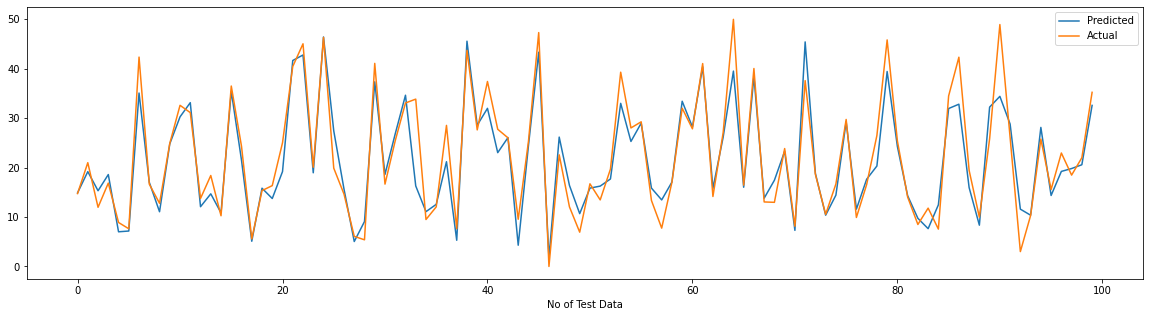

------------------------------------------------------------------------------------------------------------------------------------------------------


1425       7993       897        5813      1708
y_actual          14.730920  20.976177  11.958261  16.852300  8.888194
y_predict         12.077426  19.668303  12.490552  29.342656  9.500206
error_difference  -0.143613   1.808990  -3.343442  -1.722701  1.881696

In [63]:
predict(XGBRegressor(n_estimators=200, min_samples_leaf=3, min_samples_split=3, random_state=33),X,y)

##### **Light Gradient Boosting**

train MSE : 6.708503557038107
train RMSE : 6.708503557038107
train R2 : 0.9570099399456232
train Adj R2 :  0.9569115495121756
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 10.108549079298069
test RMSE : 3.1793944516681267
test R2 : 0.9334324682171976
test Adj R2 :  0.9329731706198001
------------------------------------------------------------------------------------------------------------------------------------------------------


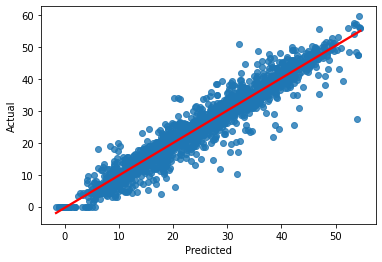

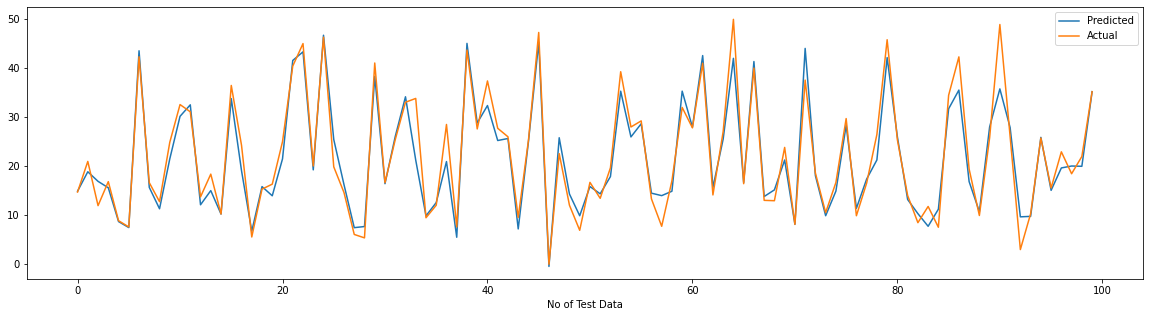

------------------------------------------------------------------------------------------------------------------------------------------------------


1425       7993       897        5813      1708
y_actual          14.730920  20.976177  11.958261  16.852300  8.888194
y_predict         12.077426  19.668303  12.490552  29.342656  9.500206
error_difference  -0.169892   2.108077  -4.953599   1.250285  0.180204

In [64]:
predict(LGBMRegressor(n_estimators=80, min_samples_leaf=3, min_samples_split=2, random_state=33),X,y)

### **creating one datataframe to add all the results of ML models**

In [ ]:
models = [['LinearRegression',              LinearRegression()],
          ['Lasso',                         Lasso(alpha=0.1, max_iter=1000)],
          ['Ridge',                         Ridge(alpha=0.1, max_iter=1000)],
          ['Elastic Net',                   ElasticNet(alpha=0.1, max_iter=1000)],
          ['DecisionTree',                  DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=3, random_state=33)],
          ['KNeighborsRegressor',           KNeighborsRegressor(n_neighbors=7)],
          ['SVR',                           SVR(kernel='rbf',C=2)],
          ['RandomForest',                  RandomForestRegressor(n_estimators=100, min_samples_leaf=7, min_samples_split=5, random_state=33)],
          ['AdaBoostRegressor',             AdaBoostRegressor(n_estimators=90, learning_rate=0.1, loss='square', random_state=33)],
          ['XGBRegressor',                  XGBRegressor(n_estimators=200, min_samples_leaf=3, min_samples_split=3, random_state=33)],
          ['Light-GBM',                     LGBMRegressor(n_estimators=100, min_samples_leaf=3, min_samples_split=2, random_state=33)]]

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 3624
    curr_model_data["Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["Train_R2_Score"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

In [66]:
all_model = pd.DataFrame(model_data)
all_model.sort_values(by='Test_R2_Score', ascending=False)

Name  Train_R2_Score  Test_R2_Score  Test_RMSE_Score
10            Light-GBM        0.962296       0.936700         3.100372
7          RandomForest        0.948612       0.913242         3.629672
9          XGBRegressor        0.916740       0.903933         3.819446
4          DecisionTree        0.989836       0.873863         4.376582
5   KNeighborsRegressor        0.869001       0.831039         5.065321
6                   SVR        0.804693       0.802134         5.481486
8     AdaBoostRegressor        0.695343       0.690261         6.858219
0      LinearRegression        0.650455       0.653896         7.249643
2                 Ridge        0.650455       0.653895         7.249649
1                 Lasso        0.649177       0.651581         7.273841
3           Elastic Net        0.646994       0.648617         7.304717

**From above results we can conclude that - top 3 model which gives us best performance on the test data-**


    Name            Train_R2_Score    Test_R2_Score    Test_RMSE_Score
    Light_GBM       0.962296	      0.936700	     3.100372
    RandomForest	0.948612	      0.913242	     3.629672
    XGBRegressor	0.916740	      0.903933	     3.819446

So, I decide to perform **Hyperparamtetr Tuning** on these top 3 Model.

## **Hyperparameter Tuning**

In [67]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

Preprocessing does not make any impact on Decision tree.
All ensemble model follow decision tree.

### **Random Forest Regressor**

Using **RandomizedSearchCV**



In [68]:
rf_params = {'n_estimators': [500,600,800,],
             'max_features': ["auto", "sqrt"],
             'max_depth': [35,40,45,50],
             'min_samples_split': [7,9,12],
             'min_samples_leaf': [4,7,10]
             }
rf_params

{'n_estimators': [500, 600, 800],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [35, 40, 45, 50],
 'min_samples_split': [7, 9, 12],
 'min_samples_leaf': [4, 7, 10]}

In [69]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()
rf_randomsearch = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=15, cv=5, verbose=2, n_jobs=-1)
rf_randomsearch.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [35, 40, 45, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 7, 10],
                                        'min_samples_split': [7, 9, 12],
                                        'n_estimators': [500, 600, 800]},
                   verbose=2)

In [70]:
rf_randomsearch.best_params_

{'n_estimators': 800,
 'min_samples_split': 9,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 50}

In [71]:
best_random = rf_randomsearch.best_estimator_
best_random

RandomForestRegressor(max_depth=50, min_samples_leaf=4, min_samples_split=9,
                      n_estimators=800)

In [72]:
# evaluation metrics on test data

rf_y_pred_test = best_random.predict(X_test)

rf_test_MSE  = mean_squared_error(y_test, rf_y_pred_test)
rf_test_RMSE = np.sqrt(rf_test_MSE)
rf_test_r2 = r2_score(y_test, rf_y_pred_test)
print("test MSE :" , rf_test_MSE)
print("test RMSE :" , rf_test_RMSE)
print("test R2 :" , rf_test_r2)
print("test Adj R2 : ",1-(1-r2_score(y_test, rf_y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# R2 on train data
y_pred_train = best_random.predict(X_train)
rf_train_r2 = r2_score(y_train,y_pred_train)
print("train R2 :", rf_train_r2) 

test MSE : 12.079816178702488
test RMSE : 3.4756029949783516
test R2 : 0.9204511408018978
test Adj R2 :  0.9199022756280378
train R2 : 0.9649458103679623


### **XGBoost Regressor**

Using **GridSearchCV**

In [73]:
xgb_params = {'n_estimators': [1000],
          'max_depth': [6,9],
          'min_samples_split': [5,7],
          'min_samples_leaf': [6,8],
          'loss': ['huber'],
          'learning_rate':[0.1]}

In [74]:
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()
xgb_gridsearch = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, n_jobs=-1, verbose=2)
xgb_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[18:37:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'loss': ['huber'],
                         'max_depth': [6, 9], 'min_samples_leaf': [6, 8],
                         'min_samples_split': [5, 7], 'n_estimators': [1000]},
             verbose=2)

In [75]:
xgb_gridsearch.best_params_

{'learning_rate': 0.1,
 'loss': 'huber',
 'max_depth': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [76]:
best_xgb_grid = xgb_gridsearch.best_estimator_
best_xgb_grid

XGBRegressor(loss='huber', max_depth=6, min_samples_leaf=6, min_samples_split=5,
             n_estimators=1000)

In [77]:
# evaluation metrics on test data

xgb_y_pred_test = best_xgb_grid.predict(X_test)

xgb_test_MSE  = mean_squared_error(y_test, xgb_y_pred_test)
xgb_test_RMSE = np.sqrt(xgb_test_MSE)
xgb_test_r2 = r2_score(y_test, xgb_y_pred_test)
print("test MSE :" , xgb_test_MSE)
print("test RMSE :" , xgb_test_RMSE)
print("test R2 :" , xgb_test_r2)
print("test Adj R2 : ",1-(1-r2_score(y_test, xgb_y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# R2 on train data
y_pred_train = best_xgb_grid.predict(X_train)
xgb_train_r2 = r2_score(y_train,y_pred_train)
print("train R2 :", xgb_train_r2) 

test MSE : 8.282435118349657
test RMSE : 2.8779220139450716
test R2 : 0.9454579229269544
test Adj R2 :  0.9450815976481616
train R2 : 0.998391273404346


### **LightGBM regressor**

Using **GridSearchCV**

In [78]:
lgb_params = {'n_estimators': [900],
          'max_depth': [7,9],
          'min_samples_split': [4,5],
          'min_samples_leaf': [4,6],
          'loss': ['huber','rmse'],
          'learning_rate':[0.1]}

In [79]:
from sklearn.model_selection import GridSearchCV

lgb = LGBMRegressor()
lgb_gridsearch = GridSearchCV(estimator=lgb, param_grid=lgb_params, cv=5, verbose=2, n_jobs=-1)
lgb_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'loss': ['huber', 'rmse'],
                         'max_depth': [7, 9], 'min_samples_leaf': [4, 6],
                         'min_samples_split': [4, 5], 'n_estimators': [900]},
             verbose=2)

In [80]:
lgb_gridsearch.best_params_

{'learning_rate': 0.1,
 'loss': 'huber',
 'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 900}

In [81]:
best_lbg_grid = lgb_gridsearch.best_estimator_
best_lbg_grid

LGBMRegressor(loss='huber', max_depth=9, min_samples_leaf=4,
              min_samples_split=4, n_estimators=900)

In [82]:
# evaluation metrics on test data
lgb_y_pred_test = best_lbg_grid.predict(X_test)

lgb_test_MSE  = mean_squared_error(y_test, lgb_y_pred_test)
lgb_test_RMSE = np.sqrt(lgb_test_MSE)
lgb_test_r2 = r2_score(y_test, lgb_y_pred_test)
print("test MSE :" , lgb_test_MSE)
print("test RMSE :" , lgb_test_RMSE)
print("test R2 :" , lgb_test_r2)
print("test Adj R2 : ",1-(1-r2_score(y_test, lgb_y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# R2 on train data
y_pred_train = best_lbg_grid.predict(X_train)
lgb_train_r2 = r2_score(y_train,y_pred_train)
print("train R2 :", lgb_train_r2)

test MSE : 7.593878860925817
test RMSE : 2.7556993415330737
test R2 : 0.9499922522546101
test Adj R2 :  0.9496472125967532
train R2 : 0.9949148044209927


## **Final Model Selection**

In [83]:
tuning_model_data = [{'Name' : 'RandomForestRegressor_tuning',
                      'Train_R2_Score' : rf_train_r2,
                      'Test_R2_Score' : rf_test_r2,
                      'Test_RMSE_Score' : rf_test_RMSE},

                      {'Name' : 'XGBRegressor_tuning',
                      'Train_R2_Score' : xgb_train_r2,
                      'Test_R2_Score' : xgb_test_r2,
                      'Test_RMSE_Score' : xgb_test_RMSE},

                      {'Name' : 'LGBMRegressor_tuning',
                      'Train_R2_Score' : lgb_train_r2,
                      'Test_R2_Score' : lgb_test_r2,
                      'Test_RMSE_Score' : lgb_test_RMSE}]

tuning_model = pd.DataFrame(tuning_model_data)
tuning_model

Name  Train_R2_Score  Test_R2_Score  \
0  RandomForestRegressor_tuning        0.964946       0.920451   
1           XGBRegressor_tuning        0.998391       0.945458   
2          LGBMRegressor_tuning        0.994915       0.949992   

   Test_RMSE_Score  
0         3.475603  
1         2.877922  
2         2.755699

In [84]:
final_result = pd.concat([all_model,tuning_model]).sort_values(by='Test_R2_Score', ascending=False)
final_result

Name  Train_R2_Score  Test_R2_Score  \
2           LGBMRegressor_tuning        0.994915       0.949992   
1            XGBRegressor_tuning        0.998391       0.945458   
10                     Light-GBM        0.962296       0.936700   
0   RandomForestRegressor_tuning        0.964946       0.920451   
7                   RandomForest        0.948612       0.913242   
9                   XGBRegressor        0.916740       0.903933   
4                   DecisionTree        0.989836       0.873863   
5            KNeighborsRegressor        0.869001       0.831039   
6                            SVR        0.804693       0.802134   
8              AdaBoostRegressor        0.695343       0.690261   
0               LinearRegression        0.650455       0.653896   
2                          Ridge        0.650455       0.653895   
1                          Lasso        0.649177       0.651581   
3                    Elastic Net        0.646994       0.648617   

    Test_RMSE_Score  
2          2.755699  
1          2.877922  
10         3.100372  
0          3.475603  
7          3.629672  
9          3.819446  
4          4.376582  
5          5.065321  
6          5.481486  
8          6.858219  
0          7.249643  
2          7.249649  
1          7.273841  
3          7.304717

From above result table we select **LGBMRegressor_tuning** as final model, because it has lowest RMSE value as well as highest R2 score on the test data.  


**LGBMRegressor_tuning**

In [85]:
best_lbg_grid = lgb_gridsearch.best_estimator_
best_lbg_grid

LGBMRegressor(loss='huber', max_depth=9, min_samples_leaf=4,
              min_samples_split=4, n_estimators=900)

In [86]:
best_lbg_grid.feature_importances_

array([3287, 4946, 3692, 3955, 2999,  560,  191, 2766, 1699,  182,  144,
       1752,  217,  157,   99])

In [87]:
importances = best_lbg_grid.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

important_feature = pd.DataFrame(importance_dict)
important_feature.sort_values(by='Feature Importance',ascending=False)

Feature  Feature Importance
1           Temperature(°C)                4946
3          Visibility (10m)                3955
2               Humidity(%)                3692
0                      Hour                3287
4   Solar Radiation (MJ/m2)                2999
7                       Day                2766
11                  Weekday                1752
8                     Month                1699
5              Rainfall(mm)                 560
12           Seasons_Spring                 217
6             Snowfall (cm)                 191
9                   Holiday                 182
13           Seasons_Summer                 157
10          Functioning Day                 144
14           Seasons_Winter                  99

Text(0, 0.5, 'Actual')

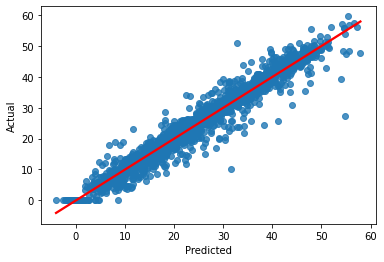

In [88]:
# graph--->best fit line on test data
sns.regplot(x=lgb_y_pred_test, y=y_test, line_kws={'color':'red'})
plt.xlabel('Predicted')
plt.ylabel('Actual')

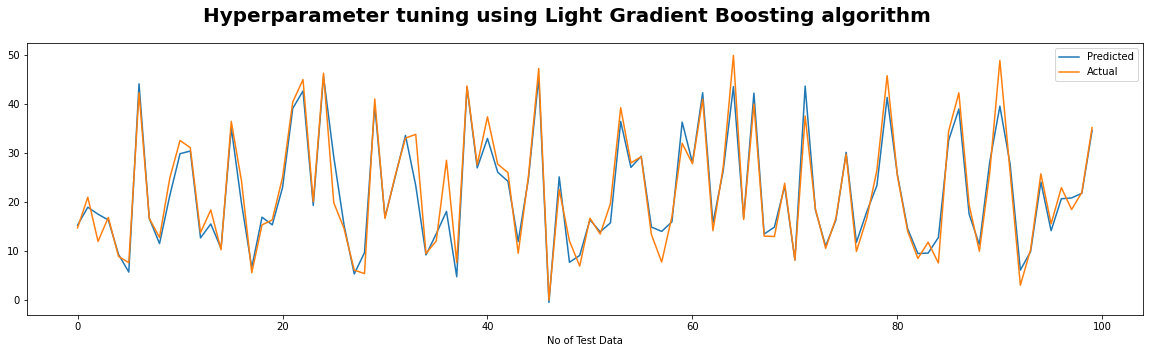

In [89]:
# graph---> actual vs predicted on first haundread test data 

plt.figure(figsize=(20,5))
plt.suptitle('Hyperparameter tuning using Light Gradient Boosting algorithm', fontsize=20, fontweight='bold')
plt.plot((lgb_y_pred_test)[:100])
plt.plot(np.array((y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## **Model Explainability**

In [ ]:
!pip install shap

In [91]:
import shap

### **Feature Importance**

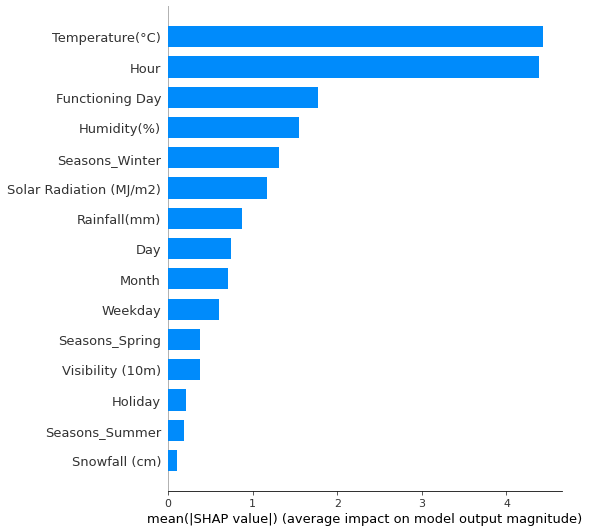

In [92]:
shap_values = shap.TreeExplainer(best_lbg_grid).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

**The top variables contribute more to the model than the bottom ones and thus have high predictive power.**

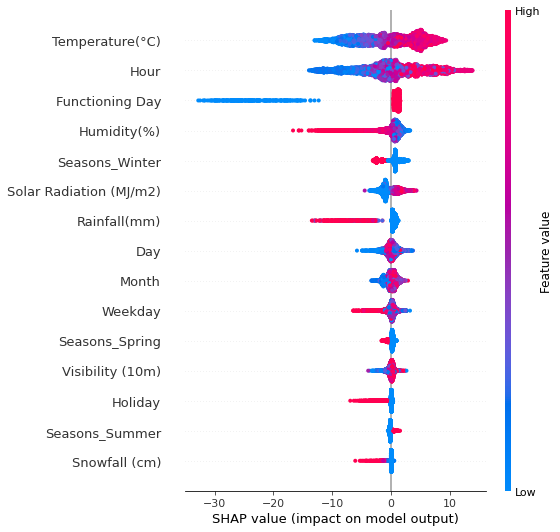

In [93]:
shap.summary_plot(shap_values, X_train)

**This plot is made of all the dots in the train data.**

    Feature importance: Variables are ranked in descending order.
    Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
    Feature value: Color shows whether that variable is high (in red) or low (in blue) for that observation.

It delivers the following information:
1. A high level of the "Temperature" content has a high and positive impact on the target variable, "Hour" is also positively correlated with the target variable.
2. Similarly, we will say "Solar Radiation", "Humidity", "Functioning Day" are negatively correlated with target variable.

## **Summary**

The project goal is to minimize the waiting time or make rental bike available at the right time, so company want to predict the bike count required at each hour for the stable supply. 
* Given dataset have past records of bike count during a day based on weather condition, season, holiday and functional day. 
* Performing exploratory data analysis on data to understand the how independent variable behavior with dependent variable. 
* Checking multicollinearity because after plotting heatmap correlation we understood there are two independent variables strongly corelate with each other, so calculate the VIF then dropping the one of the features. 
* For data preparation the categorical features convert by using one hot encoding or label encoding. 
* Methodology for solving this problem is need to understand the data, prepare the data and visuals the data, important features selection and building a models finalize based on r2 score and root mean square error after that tune the hyperparameter. 
* Most Important feature results have shown that temperature and hour of the day are most influence variable in hourly rented bike demand prediction. 
* Budling the model using different-diffrent ML algoritham like Ridge, Lasso, Decision tree, KNN, XGBoost, Random forest, LGBM, support vector machine. Comparing these model with r2 and RMSE evaluation metrics.
* We get best  r2 score and low root mean square error from LGBM model. 
* To understand how affecting the feature for best model results we use shaply for model explainability.

## **Conclusion**:
Exploratory data analysis-

* Working or Non-working Day We see 2 rental patterns across the day in bike rentals count.
  * First for a Working Day where the rental count high at peak office hours (8am and 5pm).
  * Second for a Non-working day where rental count is more or less uniform across the day with a peak at around noon.

* Temperature: People generally prefer to bike at moderate to high temperatures. We see highest rental counts between 30 to 35 degrees Celsius.

* Hour: Demad of rental bike is high at Evening time in between 4PM to 8PM.

* Weather: As one would expect, we see highest number of bike rentals on a clear day and the lowest on a snowy or rainy day.

* Season: Demand of rental bikes is high during Summer and Autumn season.

* Humidity: With increasing humidity, we see decrease in the number of bike rental count.

So from the above operations we are coming to the conclusion that for LGBM(Light Gradient Boosting Algoritham) model performing very well than the other models. So in future if we want to do some prediction with this data then the LGBM model will fit perfectly to do the prediction with the highest R2 score and lowest RMSE value.